# 03. PyTorch Computer Vision

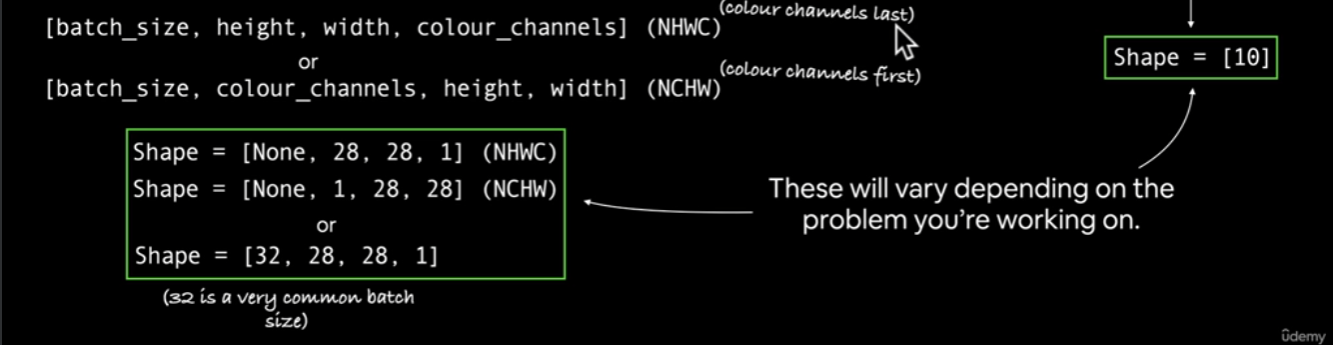

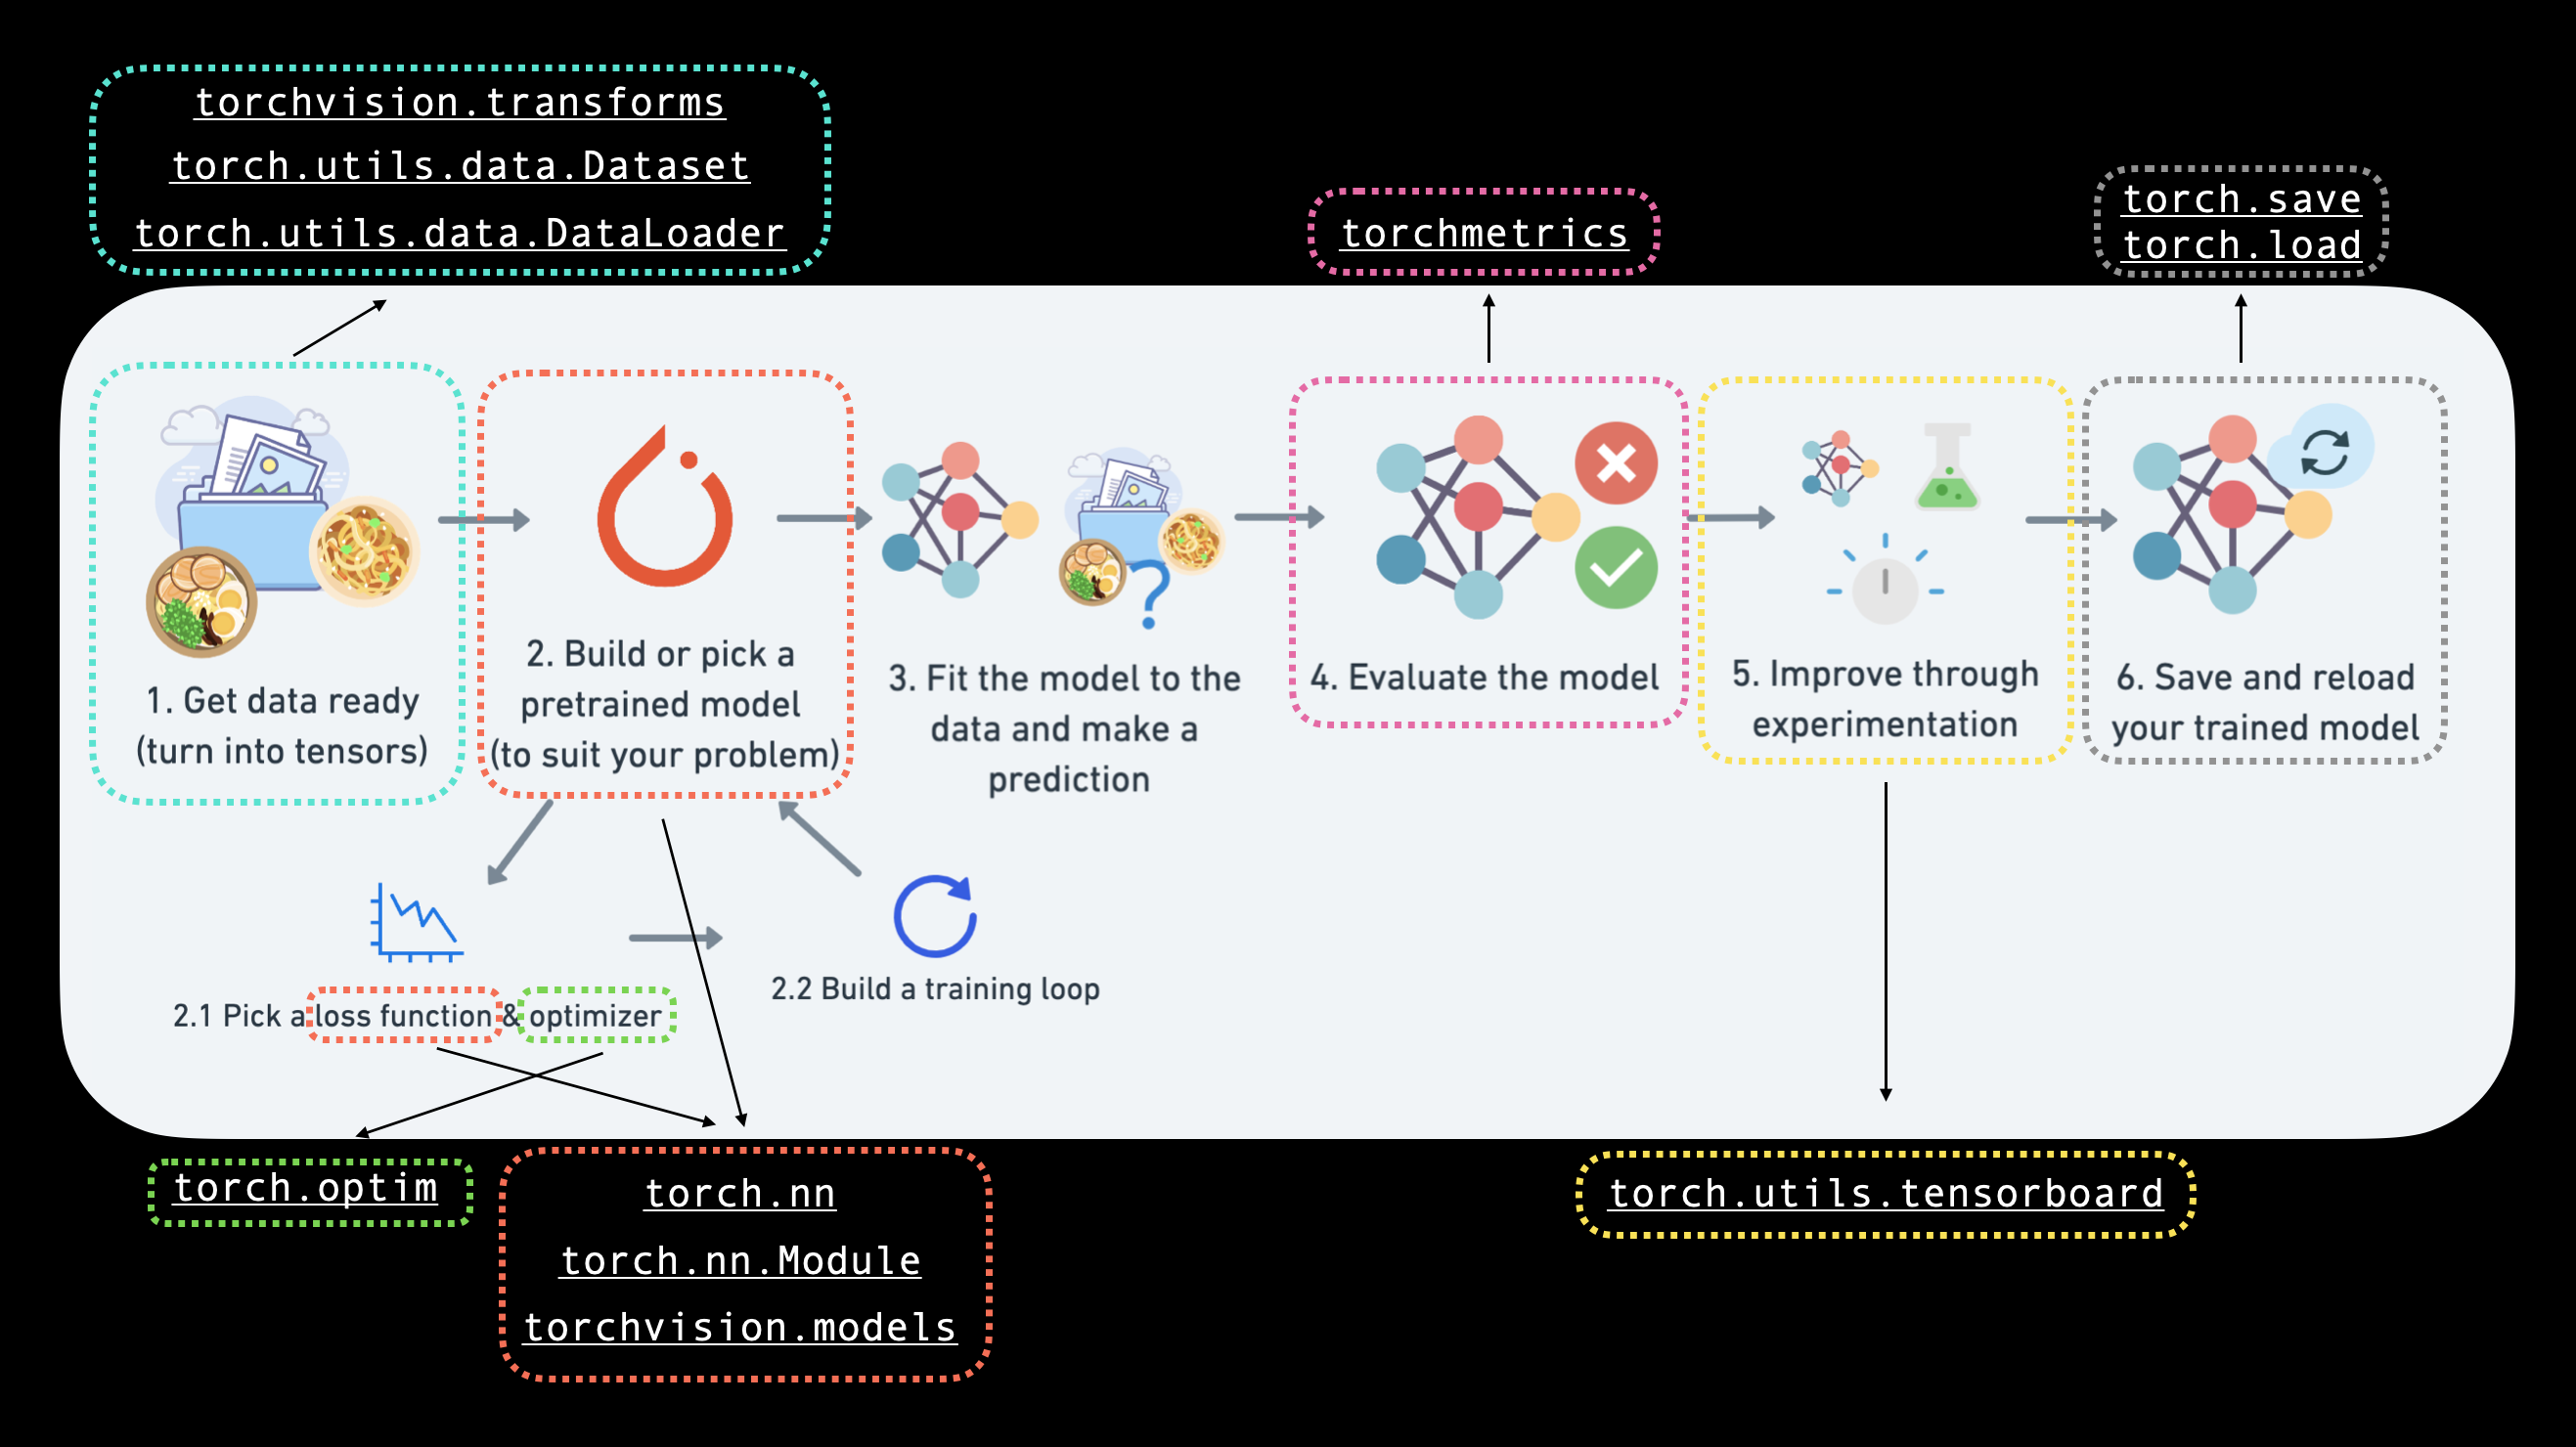



## Contents 

0. Computer vision libraries 

1. Load dataset - we'll start with FasionMNIST

2. Prepare dataset - We've got some images, we'll start with `DataLoader`

3. Model 0: Building a baseline model with loss function , optimizer etc

4. Making predictions and evaluating the model.

5. Setup device agnostic code

6. Model 1 adding non-linearity 

7. Model 2 Convolutional Neaural Network (CNN)

8. Comparing our models

9. Evaluating our best model

10. Making confusn matrix and save/load the model 

### 0.Computer Vision Libraries in PyTorch

- `torchvision` the core of PyTorch computer vision, contains models, datasets, transformations etc

- `torchvision.datasets` here we'll find a lot of datasets, also contains a series of classes/functions to make datasets.

- `torchvision.models` contains well performing computer vision models, architectures implemented in PyTorch.

- `torchvision.transforms` used for image level transformations like augmentations etc

- `torch.utils.data.Dataset` base dataset class in PyTorch
- `torch.util.data.DataLoader` create an iterable over dataset.

In [8]:
# Import torch libraries 
import torch 
from torch import nn 

# Import Vision libraries
import torchvision 
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt 

print(f"PyTorch version: {torch.__version__}",f"torchvision version: {torchvision.__version__}")

PyTorch version: 2.1.2+cu118 torchvision version: 0.16.2+cu118


### 1.Getting started 

Downloading FasionMNIST to root dairectory and start coding...

FasionMNIST contain 10 different classes of clothing materials in greyscale. The dataset is available in `torchvision.datasets`. 

`torchvision.dataset.FasionMNIST()` to download we provide. 
- `root : str ` = root dairectory 
- `train: bool` = wether we need train data or test data
- `download: bool` = wether to download or load from local 
- `transform: torchvision.transform` = what kind of transformation to use.
- `target_transform` = to transform labels (if needed)

In [15]:
# set training data
train_data = datasets.FashionMNIST(
    root='D:\\Coding_Stuff\\GitHub\\ZTM-PyTorch\\datasets\\FasionMNIST',
    download=True,
    train=True,
    transform=ToTensor(),
    target_transform=None
)

# set test data
test_data = datasets.FashionMNIST(
    root="D:\\Coding_Stuff\\GitHub\\ZTM-PyTorch\\datasets\\FasionMNIST",
    download=True,
    train=False,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:16<00:00, 1608662.27it/s]


Extracting D:\Coding_Stuff\GitHub\ZTM-PyTorch\datasets\FasionMNIST\FashionMNIST\raw\train-images-idx3-ubyte.gz to D:\Coding_Stuff\GitHub\ZTM-PyTorch\datasets\FasionMNIST\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 147876.94it/s]


Extracting D:\Coding_Stuff\GitHub\ZTM-PyTorch\datasets\FasionMNIST\FashionMNIST\raw\train-labels-idx1-ubyte.gz to D:\Coding_Stuff\GitHub\ZTM-PyTorch\datasets\FasionMNIST\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:11<00:00, 399611.94it/s]


Extracting D:\Coding_Stuff\GitHub\ZTM-PyTorch\datasets\FasionMNIST\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to D:\Coding_Stuff\GitHub\ZTM-PyTorch\datasets\FasionMNIST\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<00:00, 2584353.92it/s]


Extracting D:\Coding_Stuff\GitHub\ZTM-PyTorch\datasets\FasionMNIST\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to D:\Coding_Stuff\GitHub\ZTM-PyTorch\datasets\FasionMNIST\FashionMNIST\raw



In [20]:
image, label = train_data[0]
image [:,:5], label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

**1.1 input and output shapes of a computer vision model**

In [21]:
image.shape

torch.Size([1, 28, 28])